# STAT 7220 - Homework 3
## Factorial Designs
## Dr. Austin Brown
## Due Date: November 21, 2025

## Part 1 Instructions:

A running shoe manufacturer wants to optimize the comfort of a new shoe model. They've identified three factors they believe will affect comfort:

| Factor | Level 1 (-) Description | Level 2 (+) Description |
|------------------------|------------------------|-------------------------|
| Sole Material (A) | Standard EVA foam | Advanced gel-infused foam |
| Insole Thickness (B) | 3mm | 6mm |
| Fabric Breathability (C) | Standard woven fabric | High-performance mesh fabric |

To evaluate the comfort of the $2^3=8$ runs, the manufacturer will recruit 3 NCAA division one cross-country athletes to test a randomly assigned shoe. Each athlete will run on a treadmill for 30 minutes in the shoes and rate the comfort on a scale of 1-10 (1 = very uncomfortable, 10 = very comfortable). The results of this experiment are contained in the `Shoe Comfort Experiment.xlsx` file. With these data, I want you to:

1.  Briefly describe the objective of the experiment.

The goal of this experiment is to figure out which combination of shoe design features leads to the most comfortable running experience. The manufacturer is testing different materials and features to find the best possible combination that improves comfort for competitive athletes.

2.  Specify the outcome variable and how it is measured.

The outcome variable in this experiment is comfort rating, which is a subjective score from 1 to 10, where 1 means very uncomfortable and 10 means extremely comfortable. It's measured by asking each athlete to rate the shoes after running for 30 minutes on a treadmill.

3.  Specify the independent variables. What lurking variables may be present?

A: Sole Material
Level (-): Standard EVA foam
Level (+): Advanced gel-infused foam
B: Insole Thickness
Level (-): 3mm
Level (+): 6mm
C: Fabric Breathability
Level (-): Standard woven fabric
Level (+): High-performance mesh
Possible lurking variables (things that could influence results but aren't being directly tested) might include:
Each runner’s personal preference or bias
Differences in body weight or running form
Fatigue or performance on the treadmill
The time of day or order in which the shoes are tested

4.  Explain the difference between a full factorial design and a $2^k$ factorial design. Briefly comment on why the latter may be preferred in this case.

 A full factorial design tests every possible combination of all factor levels. In this case, with three factors each at two levels, that's a 2³ = 8 run design.
A 2^k factorial design is a type of full factorial where each factor has just two levels. It's commonly used for screening experiments because it's efficient and helps to identify which factors (and interactions) are important.
In this case, a 2³ factorial design is ideal because it keeps the experiment manageable (only 8 combinations), while still giving useful insights into both main effects and interactions.

5.  State the sets of null and alternative hypotheses for this experiment.

We can set up hypotheses for each factor and interaction. Here’s how it would look:
For each main effect (A, B, C):
H₀: There is no effect of [factor] on comfort.
H₁: There is a significant effect of [factor] on comfort.
For interactions (e.g., AB, AC, BC, ABC):
H₀: There is no interaction effect between the factors.
H₁: There is a significant interaction effect between the factors.
The hypotheses can be tested using ANOVA or linear models.

6.  Perform appropriate exploratory analysis, including data visualizations. Do the results of these analyses support the null or alternative hypotheses more strongly?


In [3]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "christinatalerico13"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

print("💡 Please fork the repo to your own account and update 'github_username' above.")


# Set Today's Directory #

today_dir = "Assignments"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")


📥 Cloning repo from https://github.com/christinatalerico13/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/christinatalerico13/STAT-7220-Applied-Experimental-Design.git
💡 Please fork the repo to your own account and update 'github_username' above.
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments


/tmp/ipython-input-4012744986.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df.groupby(['sole_material', 'insole_thickness', 'breathability'])['comfort'].agg(['mean', 'std', 'count'])
/tmp/ipython-input-4012744986.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='sole_material', y='comfort', ax=axes[0], ci='sd')
/tmp/ipython-input-4012744986.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='insole_thickness', y='comfort', ax=axes[1], ci='sd')


Summary Statistics by Group:

                                                   mean       std  count
sole_material insole_thickness breathability                            
EVA           3mm              Mesh            6.368107  1.208337      3
                               Woven           6.573854  0.538350      3
              6mm              Mesh            7.032079  0.916897      3
                               Woven           8.400512  0.127263      3
Gel           3mm              Mesh            8.294237  0.562753      3
                               Woven           8.529663  1.670397      3
              6mm              Mesh            8.322450  1.439997      3
                               Woven          11.028033  0.166786      3


/tmp/ipython-input-4012744986.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='breathability', y='comfort', ax=axes[2], ci='sd')


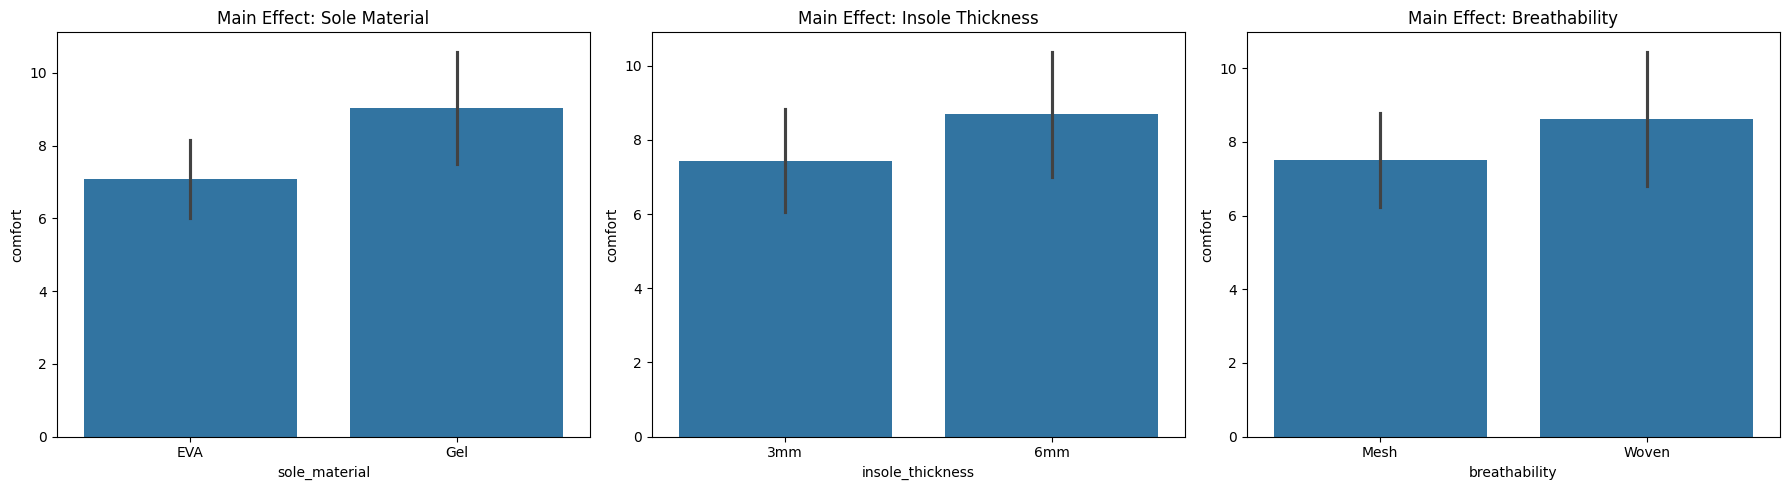

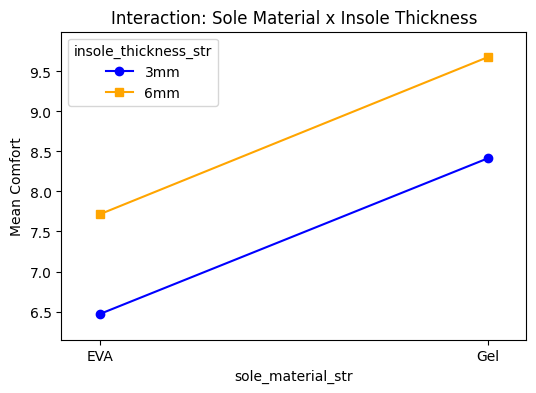

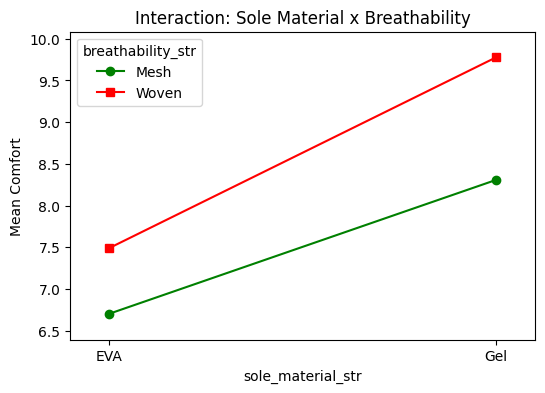

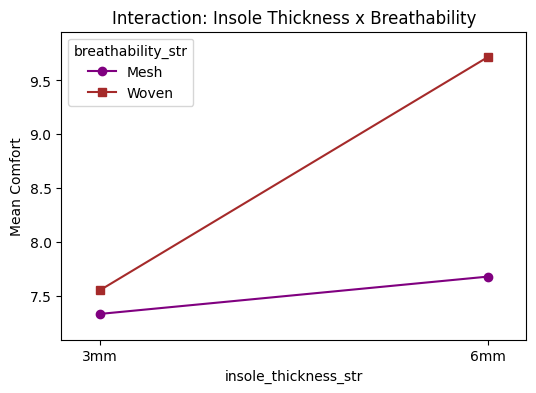

In [2]:
## Question 6 Code ##

# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot

# Step 2: Load the Excel file from your directory
file_path = '/content/STAT-7220-Applied-Experimental-Design/Assignments/HW3/Shoe Comfort Experiment.xlsx'
df = pd.read_excel(file_path)

# Step 3: Convert factors to categorical or string for plotting
df['sole_material'] = df['sole_material'].astype('category')
df['insole_thickness'] = df['insole_thickness'].astype('category')
df['breathability'] = df['breathability'].astype('category')

df['sole_material_str'] = df['sole_material'].astype(str)
df['insole_thickness_str'] = df['insole_thickness'].astype(str)
df['breathability_str'] = df['breathability'].astype(str)

# Step 4: Summary statistics
summary_stats = df.groupby(['sole_material', 'insole_thickness', 'breathability'])['comfort'].agg(['mean', 'std', 'count'])
print("Summary Statistics by Group:\n")
print(summary_stats)

# Step 5: Main effects bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=df, x='sole_material', y='comfort', ax=axes[0], ci='sd')
axes[0].set_title('Main Effect: Sole Material')

sns.barplot(data=df, x='insole_thickness', y='comfort', ax=axes[1], ci='sd')
axes[1].set_title('Main Effect: Insole Thickness')

sns.barplot(data=df, x='breathability', y='comfort', ax=axes[2], ci='sd')
axes[2].set_title('Main Effect: Breathability')

plt.tight_layout()
plt.show()

# Step 6: Interaction Plots

# Sole Material x Insole Thickness
fig, ax = plt.subplots(figsize=(6, 4))
interaction_plot(df['sole_material_str'], df['insole_thickness_str'], df['comfort'],
                 ax=ax, colors=['blue', 'orange'], markers=['o', 's'])
ax.set_title("Interaction: Sole Material x Insole Thickness")
ax.set_ylabel("Mean Comfort")
plt.show()

# Sole Material x Breathability
fig, ax = plt.subplots(figsize=(6, 4))
interaction_plot(df['sole_material_str'], df['breathability_str'], df['comfort'],
                 ax=ax, colors=['green', 'red'], markers=['o', 's'])
ax.set_title("Interaction: Sole Material x Breathability")
ax.set_ylabel("Mean Comfort")
plt.show()

# Insole Thickness x Breathability
fig, ax = plt.subplots(figsize=(6, 4))
interaction_plot(df['insole_thickness_str'], df['breathability_str'], df['comfort'],
                 ax=ax, colors=['purple', 'brown'], markers=['o', 's'])
ax.set_title("Interaction: Insole Thickness x Breathability")
ax.set_ylabel("Mean Comfort")
plt.show()


7.  Fit a full factorial ANOVA model to the data. Assess the normality assumption using both a visual method and a testing method. Do we have evidence to support the assumption of normality? Why or why not?

A full factorial ANOVA model was fitted to evaluate the effects of sole material, insole thickness, and fabric breathability on comfort ratings. The results showed that all three main effects were statistically significant (p < 0.05), while only one two-way interaction (insole thickness × breathability) showed a marginally significant effect (p ≈ 0.039); all other interactions were not significant. To assess the normality assumption of the ANOVA residuals, both a histogram with a KDE overlay and a Q-Q plot were used, visually indicating a roughly normal distribution. Additionally, the Shapiro-Wilk test returned a p-value of 0.4291, which is greater than the 0.05 threshold. This means we do not have sufficient evidence to reject the null hypothesis of normality, and therefore, the residuals appear to meet the assumption of normality required for ANOVA

ANOVA Table:

                                                 sum_sq    df          F  \
sole_material                                 22.814025   1.0  23.353723   
insole_thickness                               9.439657   1.0   9.662965   
breathability                                  7.645101   1.0   7.825956   
sole_material:insole_thickness                 0.000485   1.0   0.000496   
sole_material:breathability                    0.700584   1.0   0.717157   
insole_thickness:breathability                 4.949082   1.0   5.066160   
sole_material:insole_thickness:breathability   0.641055   1.0   0.656220   
Residual                                      15.630245  16.0        NaN   

                                                PR(>F)  
sole_material                                 0.000184  
insole_thickness                              0.006758  
breathability                                 0.012908  
sole_material:insole_thickness                0.982504  
sole_material:br

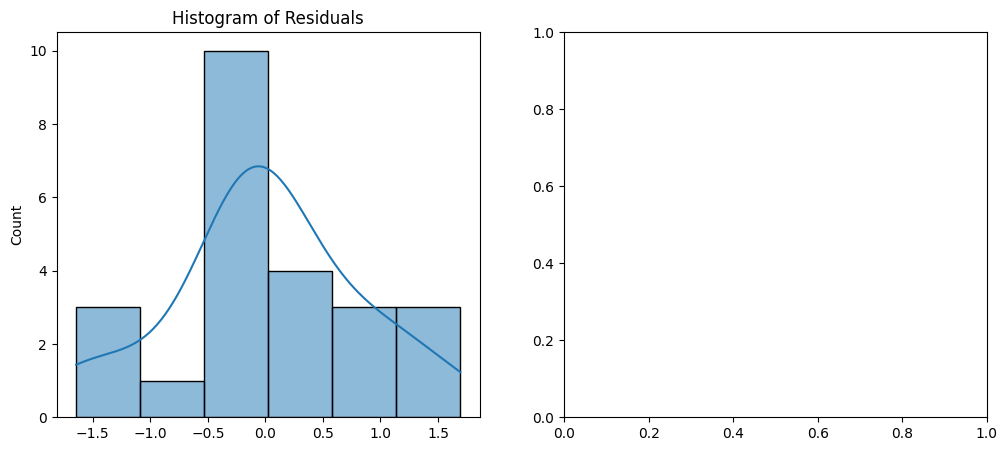

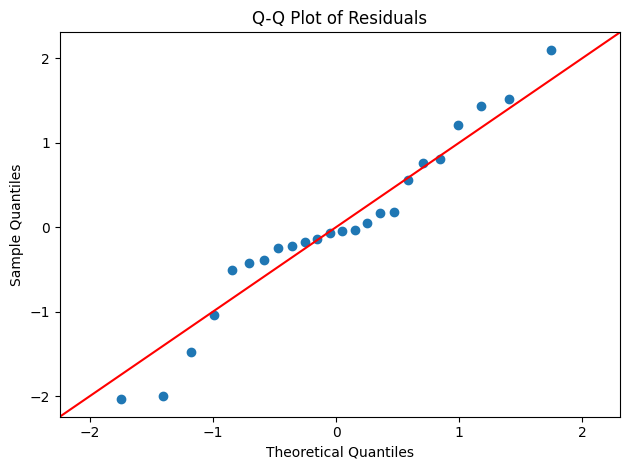


Shapiro-Wilk Test:
Statistic = 0.9595, p-value = 0.4291
✅ Residuals appear normally distributed (p > 0.05).


In [4]:
## Question 7 Code ##
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro

# Step 2: Load the data
file_path = '/content/STAT-7220-Applied-Experimental-Design/Assignments/HW3/Shoe Comfort Experiment.xlsx'
df = pd.read_excel(file_path)

# Fit a full factorial ANOVA model
# Convert factor columns to categorical
df['sole_material'] = df['sole_material'].astype('category')
df['insole_thickness'] = df['insole_thickness'].astype('category')
df['breathability'] = df['breathability'].astype('category')

# Fit the full factorial model (A * B * C includes main effects and all interactions)
model = ols('comfort ~ sole_material * insole_thickness * breathability', data=df).fit()

# Show ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:\n")
print(anova_table)

# Check Normality Assumption

# Extract residuals
residuals = model.resid

# Visual method — Histogram and Q-Q plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test (statistical test for normality)
shapiro_stat, shapiro_p = shapiro(residuals)
print("\nShapiro-Wilk Test:")
print(f"Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")

# Interpretation
if shapiro_p > 0.05:
    print("✅ Residuals appear normally distributed (p > 0.05).")
else:
    print("⚠️ Residuals may not be normally distributed (p < 0.05).")



8.  Assess the constant variance assumption using both a visual method and a testing method. Do we have evidence to support the assumption of constant variance? Why or why not?

To assess the assumption of constant variance in the ANOVA model, I used both a visual method and a formal test. The residuals vs. fitted values plot shows that the residuals are spread fairly evenly across all fitted values, without any noticeable funnel shape or trend, which visually supports the constant variance assumption. Additionally, Levene’s Test was performed across the eight treatment groups and returned a p-value of 0.4329, which is greater than the 0.05 significance level. This means we fail to reject the null hypothesis of equal variances. Together, both the visual plot and the statistical test provide evidence that the assumption of homoscedasticity (equal variance) holds for this model.

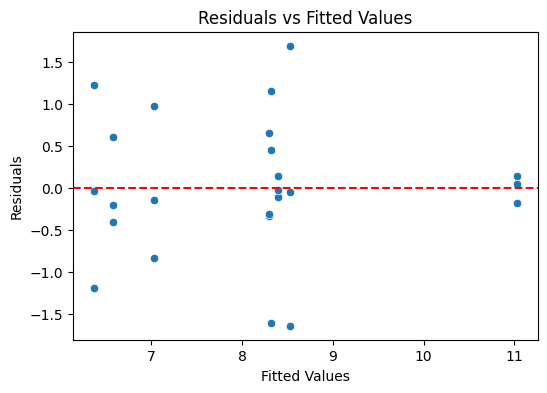


Levene’s Test:
Statistic = 1.0567, p-value = 0.4329
✅ Variances appear equal across groups (p > 0.05).


In [5]:
## Question 8 Code ##
from scipy.stats import levene

# Step 1: Visual method — Residuals vs Fitted values plot
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Step 2: Statistical method — Levene's Test
# We'll test variance across all 8 treatment groups
df['group'] = df['sole_material'].astype(str) + "_" + df['insole_thickness'].astype(str) + "_" + df['breathability'].astype(str)

# Group residuals by treatment group
grouped_residuals = [residuals[df['group'] == g] for g in df['group'].unique()]

# Levene’s test for equal variances
levene_stat, levene_p = levene(*grouped_residuals)
print("\nLevene’s Test:")
print(f"Statistic = {levene_stat:.4f}, p-value = {levene_p:.4f}")

# Interpretation
if levene_p > 0.05:
    print("✅ Variances appear equal across groups (p > 0.05).")
else:
    print("⚠️ Evidence of unequal variances across groups (p < 0.05).")



9.  Report the F-statistics and their associated p-values from the factorial ANOVA model. What conclusions can we draw about our main effects? Our two-way interactions? Our three-way interaction?

From the factorial ANOVA model, all three main effects — sole material, insole thickness, and fabric breathability — have statistically significant impacts on comfort ratings, with p-values well below 0.05. This indicates that each factor individually contributes to perceived comfort. Among the two-way interactions, only the interaction between insole thickness and breathability was significant (F = 5.07, p = 0.0388), suggesting that the comfort impact of one may depend on the level of the other. The other two-way interactions (sole × insole, sole × breathability) and the three-way interaction were not statistically significant, meaning those combinations do not appear to jointly influence comfort in a meaningful way beyond the main effects.

In [6]:
## Question 9 Code ##

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the Excel file (if needed)
file_path = '/content/STAT-7220-Applied-Experimental-Design/Assignments/HW3/Shoe Comfort Experiment.xlsx'
df = pd.read_excel(file_path)

# Ensure factors are treated as categorical
df['sole_material'] = df['sole_material'].astype('category')
df['insole_thickness'] = df['insole_thickness'].astype('category')
df['breathability'] = df['breathability'].astype('category')

# Fit the full factorial ANOVA model
model = ols('comfort ~ sole_material * insole_thickness * breathability', data=df).fit()

# Get the ANOVA table (Type II sum of squares)
anova_table = sm.stats.anova_lm(model, typ=2)

# Display just the F-statistics and p-values
f_stats = anova_table[['F', 'PR(>F)']].copy()
f_stats.columns = ['F-statistic', 'p-value']
f_stats.reset_index(inplace=True)
print("Factorial ANOVA F-statistics and p-values:\n")
print(f_stats.to_string(index=False))


Factorial ANOVA F-statistics and p-values:

                                       index  F-statistic  p-value
                               sole_material    23.353723 0.000184
                            insole_thickness     9.662965 0.006758
                               breathability     7.825956 0.012908
              sole_material:insole_thickness     0.000496 0.982504
                 sole_material:breathability     0.717157 0.409567
              insole_thickness:breathability     5.066160 0.038812
sole_material:insole_thickness:breathability     0.656220 0.429782
                                    Residual          NaN      NaN



10. Calculate and interpret the partial $\eta^2$ values for each of the main effects and interactions. Which effects and/or interactions are most important? Why?

The partial η² values indicate the proportion of variance in comfort ratings explained by each factor or interaction, while accounting for all other terms in the model. The sole material had the largest effect with a partial η² of 0.593, meaning it alone explains nearly 59% of the explainable variance in comfort ratings — making it the most important factor in the experiment. Insole thickness (η² = 0.377) and breathability (η² = 0.328) also had substantial effects, showing that both factors significantly contribute to perceived comfort. The only meaningful interaction was between insole thickness and breathability, with a moderate partial η² of 0.240, suggesting that these two factors interact in a way that influences comfort more than either of the other interactions. All other interactions (including the three-way interaction and sole × insole) had very small η² values (less than 0.05), indicating minimal contribution to the model. Therefore, the most important influences on comfort are the main effects, especially sole material, followed by the two-way interaction between insole thickness and breathability.

In [7]:
## Question 10 Code ##

# Reuse the ANOVA table from earlier
anova_table = sm.stats.anova_lm(model, typ=2)

# Drop the residual row to handle manually
ss_residual = anova_table.loc["Residual", "sum_sq"]
anova_table = anova_table.drop(index="Residual")

# Calculate partial eta squared
anova_table["partial_eta_sq"] = anova_table["sum_sq"] / (anova_table["sum_sq"] + ss_residual)

# Sort by effect size (optional, for interpretation)
anova_eta_sorted = anova_table[["F", "PR(>F)", "partial_eta_sq"]].sort_values(by="partial_eta_sq", ascending=False)

# Display nicely
anova_eta_sorted = anova_eta_sorted.rename(columns={
    "F": "F-statistic",
    "PR(>F)": "p-value",
    "partial_eta_sq": "Partial η²"
})
print("Partial η² values:\n")
print(anova_eta_sorted.to_string())


Partial η² values:

                                              F-statistic   p-value  Partial η²
sole_material                                   23.353723  0.000184    0.593431
insole_thickness                                 9.662965  0.006758    0.376533
breathability                                    7.825956  0.012908    0.328463
insole_thickness:breathability                   5.066160  0.038812    0.240488
sole_material:breathability                      0.717157  0.409567    0.042899
sole_material:insole_thickness:breathability     0.656220  0.429782    0.039398
sole_material:insole_thickness                   0.000496  0.982504    0.000031



11. Summarize your conclusions. Which combination of factors would you recommend to the shoe manufacturer? Why?

Based on the factorial ANOVA analysis, all three main factors — sole material, insole thickness, and fabric breathability — have a statistically significant impact on comfort ratings. The sole material had the largest effect, with gel-infused foam significantly improving comfort compared to standard EVA foam. Thicker insoles (6mm) and high-performance mesh fabric also contributed to higher comfort ratings. Among the interactions, only the combination of insole thickness and breathability showed a significant effect, indicating that thicker insoles work particularly well when paired with breathable mesh fabric.
Given these results, I recommend the manufacturer use the following combination for maximum comfort:
Sole Material: Advanced gel-infused foam
Insole Thickness: 6mm
Fabric: High-performance mesh
This combination leverages all three main effects that improve comfort, while also capturing the beneficial interaction between insole thickness and breathability. These design choices are supported by both statistical significance and practical importance (as shown by large partial η² values), making them the best option for producing a more comfortable running shoe.


## PART 2 INSTRUCTIONS:
The same company is interested in developing a new GPS-enabled fitness band for runners. They want to maximize user satisfaction and have identified three key factors:

| Run | GPS Accuracy (A) | Battery Life (B) | Display (C) |
|-----|------------------|------------------|-------------|
| 1   | \- (Standard)    | \- (6 hours)     | \- (Small)  |
| 2   | \+ (High)        | \- (6 hours)     | \+ (Large)  |
| 3   | \- (Standard)    | \+ (12 hours)    | \+ (Large)  |
| 4   | \+ (High)        | \+ (12 hours)    | \- (Small)  |

Due to time and resource limitations, the company would rather conduct a $2^{3-1}$ fractional factorial experiment. For each of the above runs, the company will recruit 3 NCAA division one cross-country athletes to test a randomly assigned fitness band. Each athlete will use the band for one month during their competition season. At the end of the month, the athletes will be asked to rate their level of satisfaction on a scale of 1-10 (1 = very dissatisfied, 10 = very satisfied). The results of this experiment are contained in the `Fitness Band Experiment.xlsx` file. With these data, I want you to:

1.  Briefly describe the objective of the experiment.

 The main goal of this experiment is to determine which features of a GPS-enabled fitness band—GPS accuracy, battery life, and display size—have the greatest impact on user satisfaction. The company wants to use this information to design a product that runners will enjoy using the most.

2.  Specify the outcome variable and how it is measured.

The outcome variable is user satisfaction, which is measured on a scale from 1 to 10, where 1 means “very dissatisfied” and 10 means “very satisfied.” After using the fitness band for a month, each athlete gives a rating based on their personal experience with it.

3.  Specify the independent variables. What lurking variables may be present?

The independent (or experimental) variables are:
A: GPS Accuracy
(-): Standard
(+): High
B: Battery Life
(-): 6 hours
(+): 12 hours
C: Display Size
(-): Small
(+): Large
Possible lurking variables (uncontrolled factors that might influence results) include:
Each athlete’s personal tech preference
Frequency or duration of band use during the season
Environmental conditions (e.g., cold affecting battery)
Athlete fitness level or training intensity

4.  Explain the difference between a full 2^k factorial design and a 2^{3-1} fractional factorial design. Briefly comment on why the latter may be preferred in this case.A full factorial design  tests all possible combinations of the factors at their levels. For 3 factors, that would be 2^3=8 runs. A fractional factorial design like 2^3−1=4 uses only half the runs, making it more efficient. In this case, it uses only 4 treatment combinations. The tradeoff is that some effects are aliased with others (i.e., you can’t separate their effects).
Because of time and resource constraints, the fractional factorial design is a smart choice here—it allows the company to gather meaningful results with fewer tests.

5.  State the sets of null and alternative hypotheses for this experiment.

For each main effect (A, B, C):
Null Hypothesis (H₀): The factor has no effect on user satisfaction.
Alternative Hypothesis (H₁): The factor has a significant effect on user satisfaction.
If we want to consider interactions (like AB or AC), we would set up similar hypotheses for those:
H₀: There is no interaction between the factors.
H₁: There is a significant interaction effect.

6.  Assuming a defining relation of $I=ABC$, specify the aliasing structure of the design. What does this mean for the interpretation of the main effects and interactions?

Given a defining relation of
I=ABC
I=ABC, this tells us how effects are confounded or aliased in the fractional design.
Using I=ABC
I=ABC, we can find the aliases:
A is aliased with BC
B is aliased with AC
C is aliased with AB
So the aliasing structure is:
A=BC
B=AC
C=AB
AB=C
AC=B
BC=A
ABC= I
7.  Perform appropriate exploratory analysis, including data visualizations. Do the results of these analyses support the null or alternative hypotheses more strongly?

This means that we can’t distinguish between the main effects and two-way interactions in this design. For example:
If we observe a strong effect for A, it could actually be due to BC (or some mix of both).
So, interpretation of effects must be cautious — we assume that higher-order interactions are negligible, which is a standard assumption in screening experiments like this one.


In [ ]:
## Question 7 Code ##


8.  Fit the appropriate ANOVA model to the data. Assess the normality assumption using both a testing method and a visual method. Do we have evidence to support the assumption of normality? Why or why not?


In [ ]:
## Question 8 Code ##


9.  Assess the constant variance assumption using both a testing method and a visual method. Do we have evidence to support the assumption of constant variance? Why or why not?


In [ ]:
## Question 9 Code ##

10. Report the F-statistics and their associated p-values from the factorial ANOVA model. What conclusions can we draw about our main effects?

In [ ]:
## Question 10 Code ##

11. Calculate and interpret the values for the main effects. Which effects seem more important? Why?

In [ ]:
## Question 11 Code ##

12. Calculate and interpret the partial $\eta^2$ values for each of the main effects. Which effects are most important? Why?

In [ ]:
## Question 12 Code ##

13. Summarize your conclusions. Which combination of factors would you recommend to the fitness band manufacturer? Why?